<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#env" data-toc-modified-id="env-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>env</a></span><ul class="toc-item"><li><span><a href="#get-phytoplankton-growth-rate" data-toc-modified-id="get-phytoplankton-growth-rate-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>get phytoplankton growth rate</a></span></li><li><span><a href="#get-bacterial-decomposer-growth-rate" data-toc-modified-id="get-bacterial-decomposer-growth-rate-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>get bacterial decomposer growth rate</a></span></li><li><span><a href="#parameters" data-toc-modified-id="parameters-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>parameters</a></span></li></ul></li><li><span><a href="#when-no-artificial-carbon-removal" data-toc-modified-id="when-no-artificial-carbon-removal-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>when no artificial carbon removal</a></span></li><li><span><a href="#artificial-carbon-removal-not-zero" data-toc-modified-id="artificial-carbon-removal-not-zero-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>artificial carbon removal not zero</a></span></li><li><span><a href="#effect-of-initial-carbon-density,-carbon-removal-rate-not-zero" data-toc-modified-id="effect-of-initial-carbon-density,-carbon-removal-rate-not-zero-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>effect of initial carbon density, carbon removal rate not zero</a></span></li><li><span><a href="#effect-of-carbon-removal,-initial-carbon-density-=-10$^{-5}gC/m^3$" data-toc-modified-id="effect-of-carbon-removal,-initial-carbon-density-=-10$^{-5}gC/m^3$-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>effect of carbon removal, initial carbon density = 10$^{-5}gC/m^3$</a></span></li></ul></div>

# env

In [1]:
library(repr) ; options(repr.plot.width=18, repr.plot.height= 10) ## change plot default parameter in Jupyter
source("../code/func.R")
source("../code/respEff.R")

This notebook would simulate in a 23-25 degree Celsius homogeneous pool of stagnant lake with unlimited nutrient, the interaction of phytoplankton and bacterial decomposer with general biological features.

## get phytoplankton growth rate

In [2]:
rAte = gRate[which(gRate$role=="photocell"),]
nrow(rAte)

[1] 56

In [3]:
rAte = rAte[order(rAte$rate.23C),]
gRAte = rAte[which(rAte$ConGenus==rAte$ConGenus[nrow(rAte)/2] & rAte$ConSpecies==rAte$ConSpecies[nrow(rAte)/2]),]
nrow(gRAte);gRAte[1,]

[1] 34

,FinalID,StandardisedTraitValue,StandardisedTraitUnit,ConPhylum,ConGenus,ConSpecies,ConTemp,ConTempUnit,Ea.eV,role,stdConst.day,rate.23C
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
737,MTD5070,6.22e-06,s^-1,Cyanobacteria,Mastigocladus,laminosus,61.9943,Celsius,0.32,photocell,34861.64,0.1249392


In [4]:
summary(gRAte$rate.23C)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1249  0.2525  0.3027  0.3409  0.4099  0.8292 

## get bacterial decomposer growth rate

In [5]:
rBte = rAte = gRate[which(gRate$role!="photocell"),]
nrow(rBte)

[1] 3104

In [6]:
rBte = rBte[order(rBte$rate.23C),]
gRBte = rBte[which(rBte$ConGenus==rBte$ConGenus[nrow(rBte)/2] & rBte$ConSpecies==rBte$ConSpecies[nrow(rBte)/2]),]
nrow(gRBte);gRBte[1,]

[1] 522

,FinalID,StandardisedTraitValue,StandardisedTraitUnit,ConPhylum,ConGenus,ConSpecies,ConTemp,ConTempUnit,Ea.eV,role,stdConst.day,rate.23C
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
644,MTD5058,4.52e-05,s^-1,Proteobacteria,Escherichia,coli,48.47718,Celsius,0.66,bacterial decomposer,85823577743,0.5034485


In [7]:
summary(gRBte$rate.23C)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5034  9.1578 14.4419 14.3042 18.6187 31.7549 

## parameters

In [8]:
pA = rep(0,9)
pA[1] = 0 ## rate of artificial carbon removal
pA[2] = .875 ## [respEff.R] fraction of phytoplankton non-respired carbon (overview feature, 23 deg-C)
pA[3] = .63 ## [cite] fraction of phytoplankton carbon incorporated into biomass (Chlorella pyrenoidosa, 25 deg-C)
pA[4] = mean(gRAte$rate.23C) ## [respEff.R, BioTrait] phytoplankton growth rate (Cyanobacteria Mastigocladus laminosus, 23 deg-C)
pA[5] = .34 ## [calculated from cite] per density phytoplankton intraspecific interference rate (Spirulina sp, 30 deg-C)
pA[6] = 1-100e-3/(28*(1-.8)) ## [cite] fraction of bacterial decomposer non-respired carbon (overview feature, 23 deg-C)
pA[7] = .55 ## [cite] fraction of bacterial decomposer carbon incorporated into biomass (overview feature, 23 deg-C)
pA[8] = mean(gRBte$rate.23C) ## [respEff.R] per density bacterial decomposer growth rate (Proteobacteria Escherichia coli, 23 deg-C)
pA[9] = -log(.5)/5 ## [cite] bacterial decomposer death rate (overview feature, 23 deg-C)
pA

[1]  0.0000000  0.8750000  0.6300000  0.3408563  0.3400000  0.9821429  0.5500000
[8] 14.3042365  0.1386294

# when no artificial carbon removal

In [9]:
ebcAlt(pA)

C,P,B,total
<dbl>,<dbl>,<dbl>,<dbl>
0.00000000,0.0000000,0.00000,0.00000000
0.01794128,0.0000000,0.00000,0.01794128
Inf,0.5526383,0.00000,Inf
0.01794128,0.5526383,35.96584,36.53642338


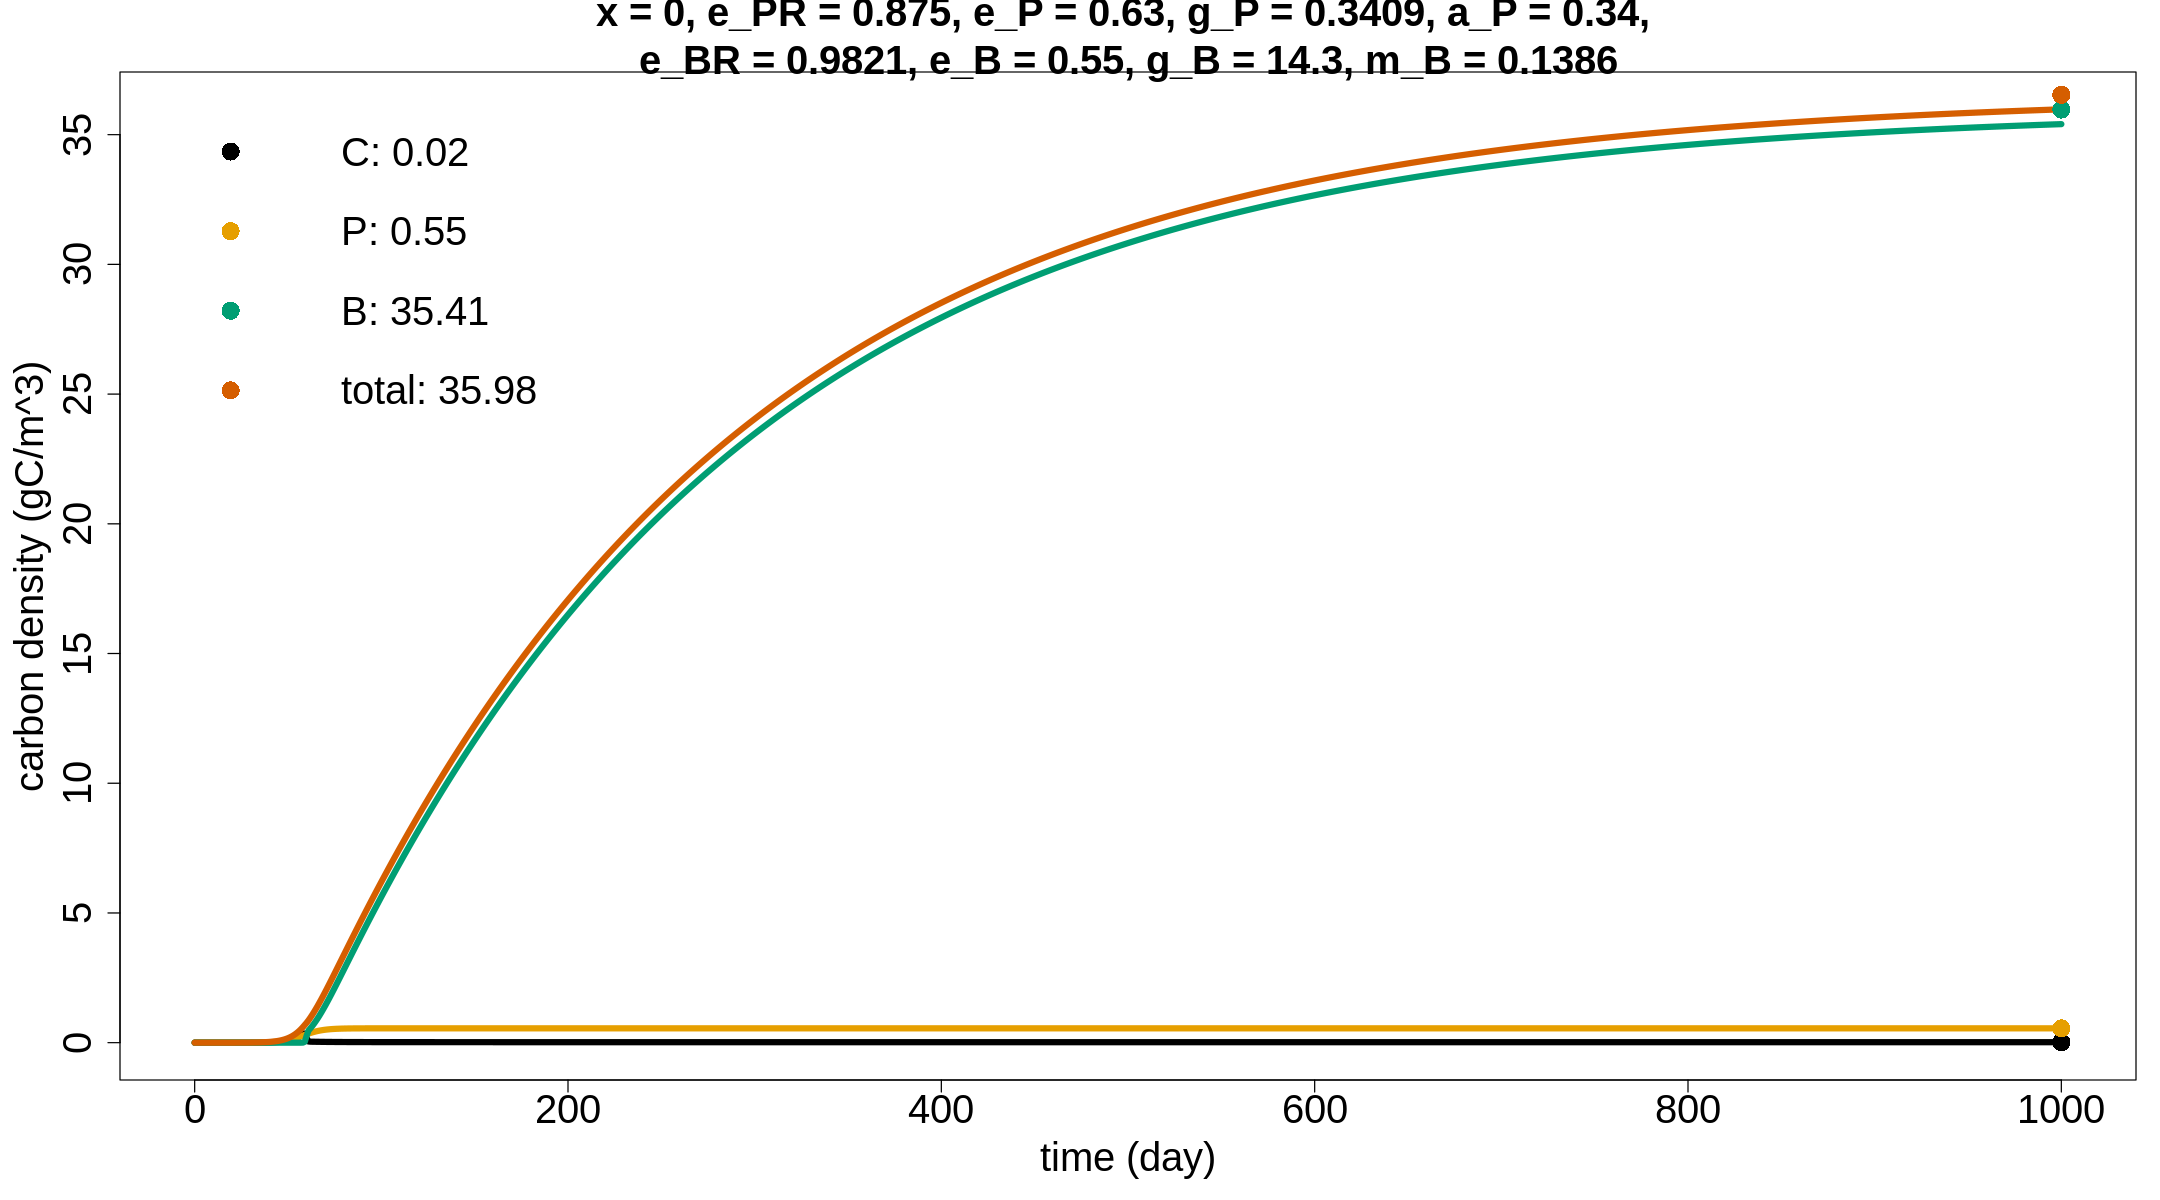

In [10]:
ebcPlt(rep(1e-5,3),pA)

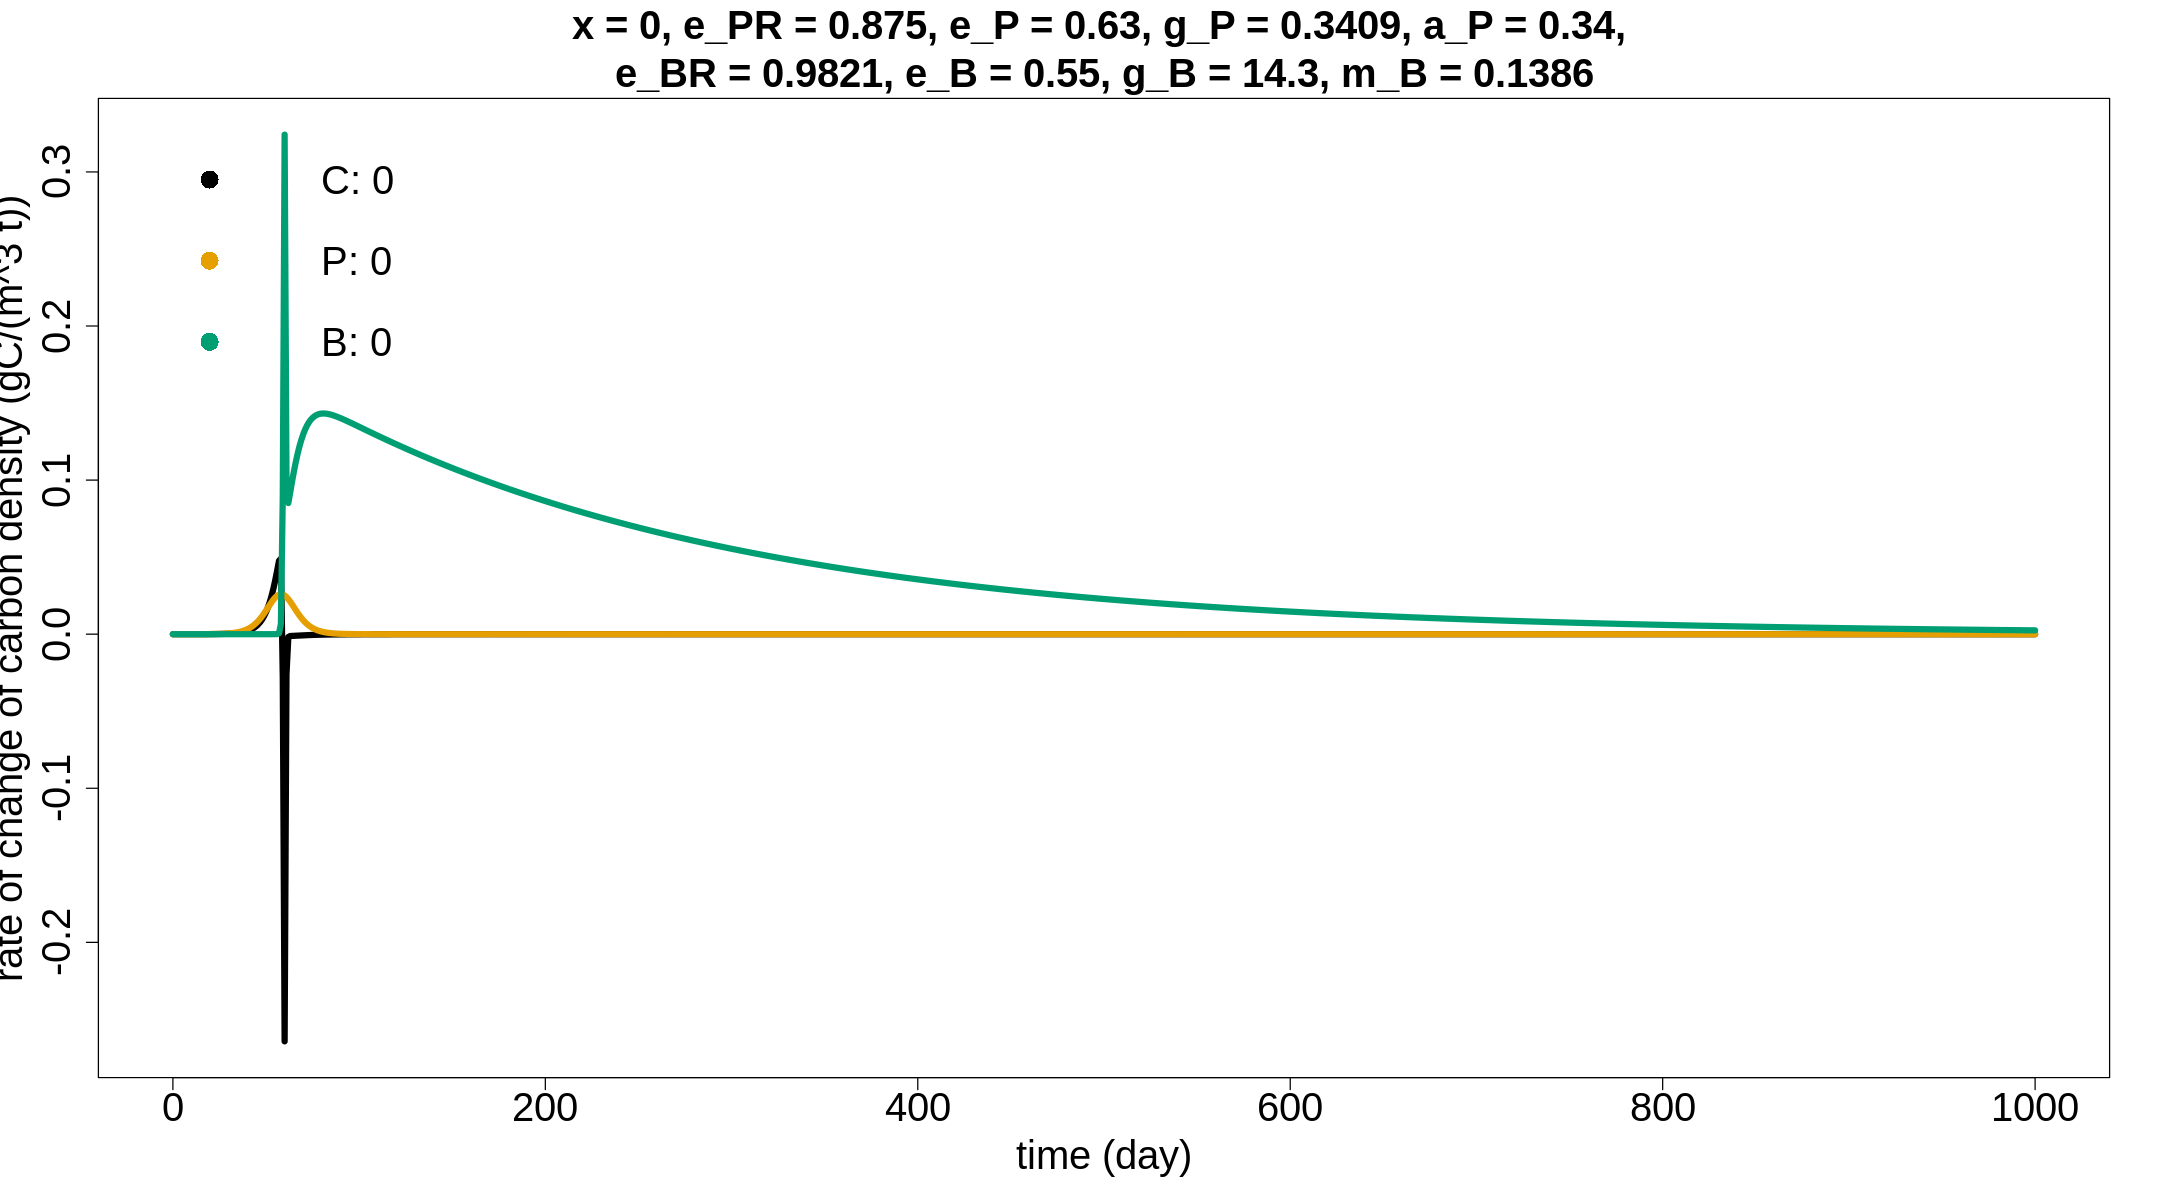

In [11]:
ebcRPlt(rep(1e-5,3),pA)

# artificial carbon removal not zero

In [12]:
pA0 = c(1,pA[-1])
ebcAlt(pA0)

C,P,B,total
<dbl>,<dbl>,<dbl>,<dbl>
0.00000000,0.0000000,0.000000,0.0000000
0.01794128,0.0000000,-3.914924,-3.8969828
0.16482396,0.5526383,0.000000,0.7174623
0.01794128,0.5526383,32.050920,32.6214993


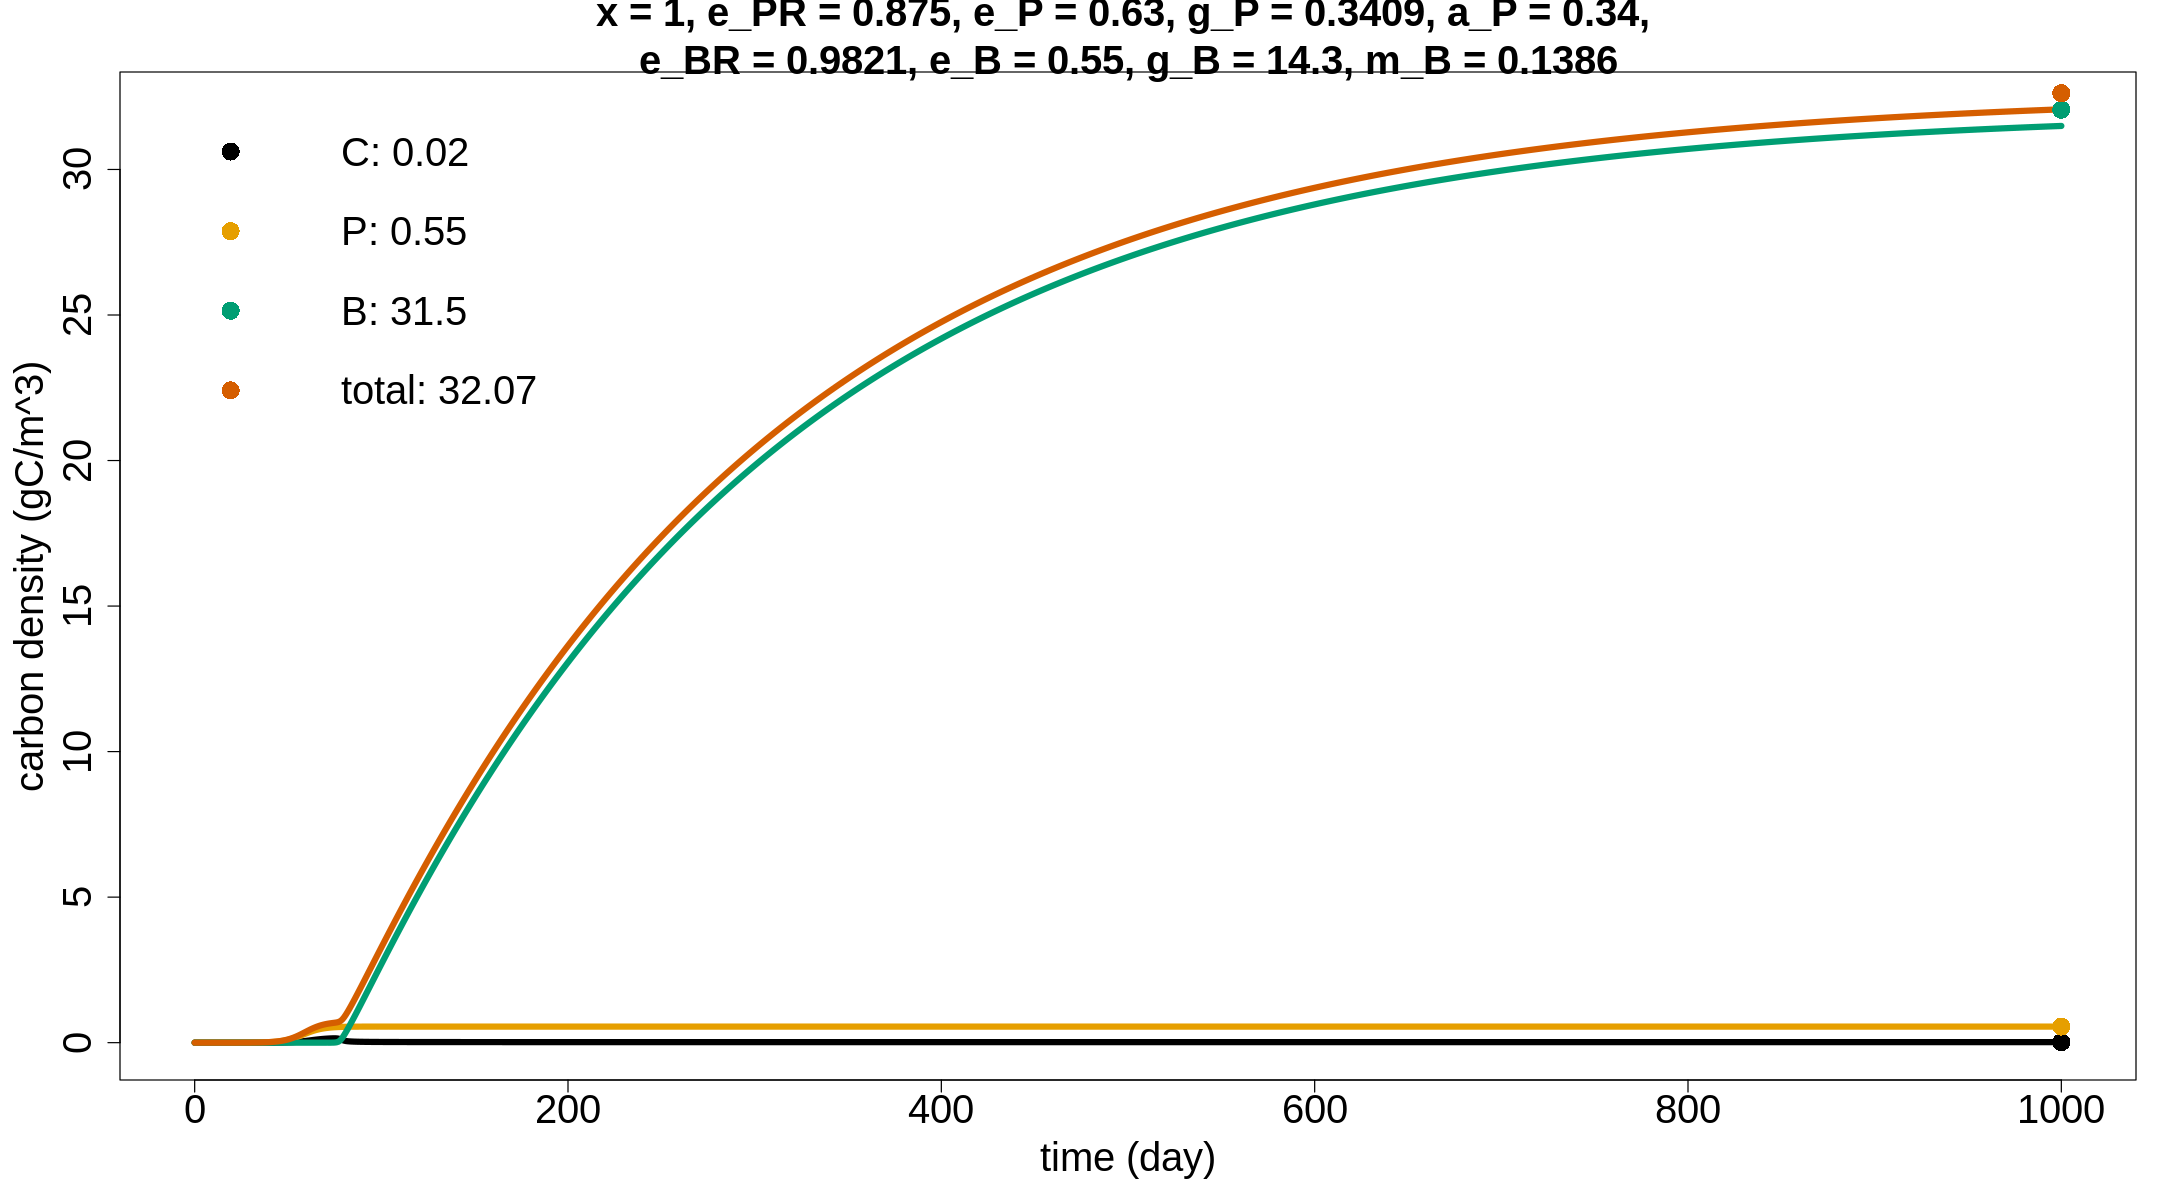

In [13]:
ebcPlt(rep(1e-5,3),pA0)

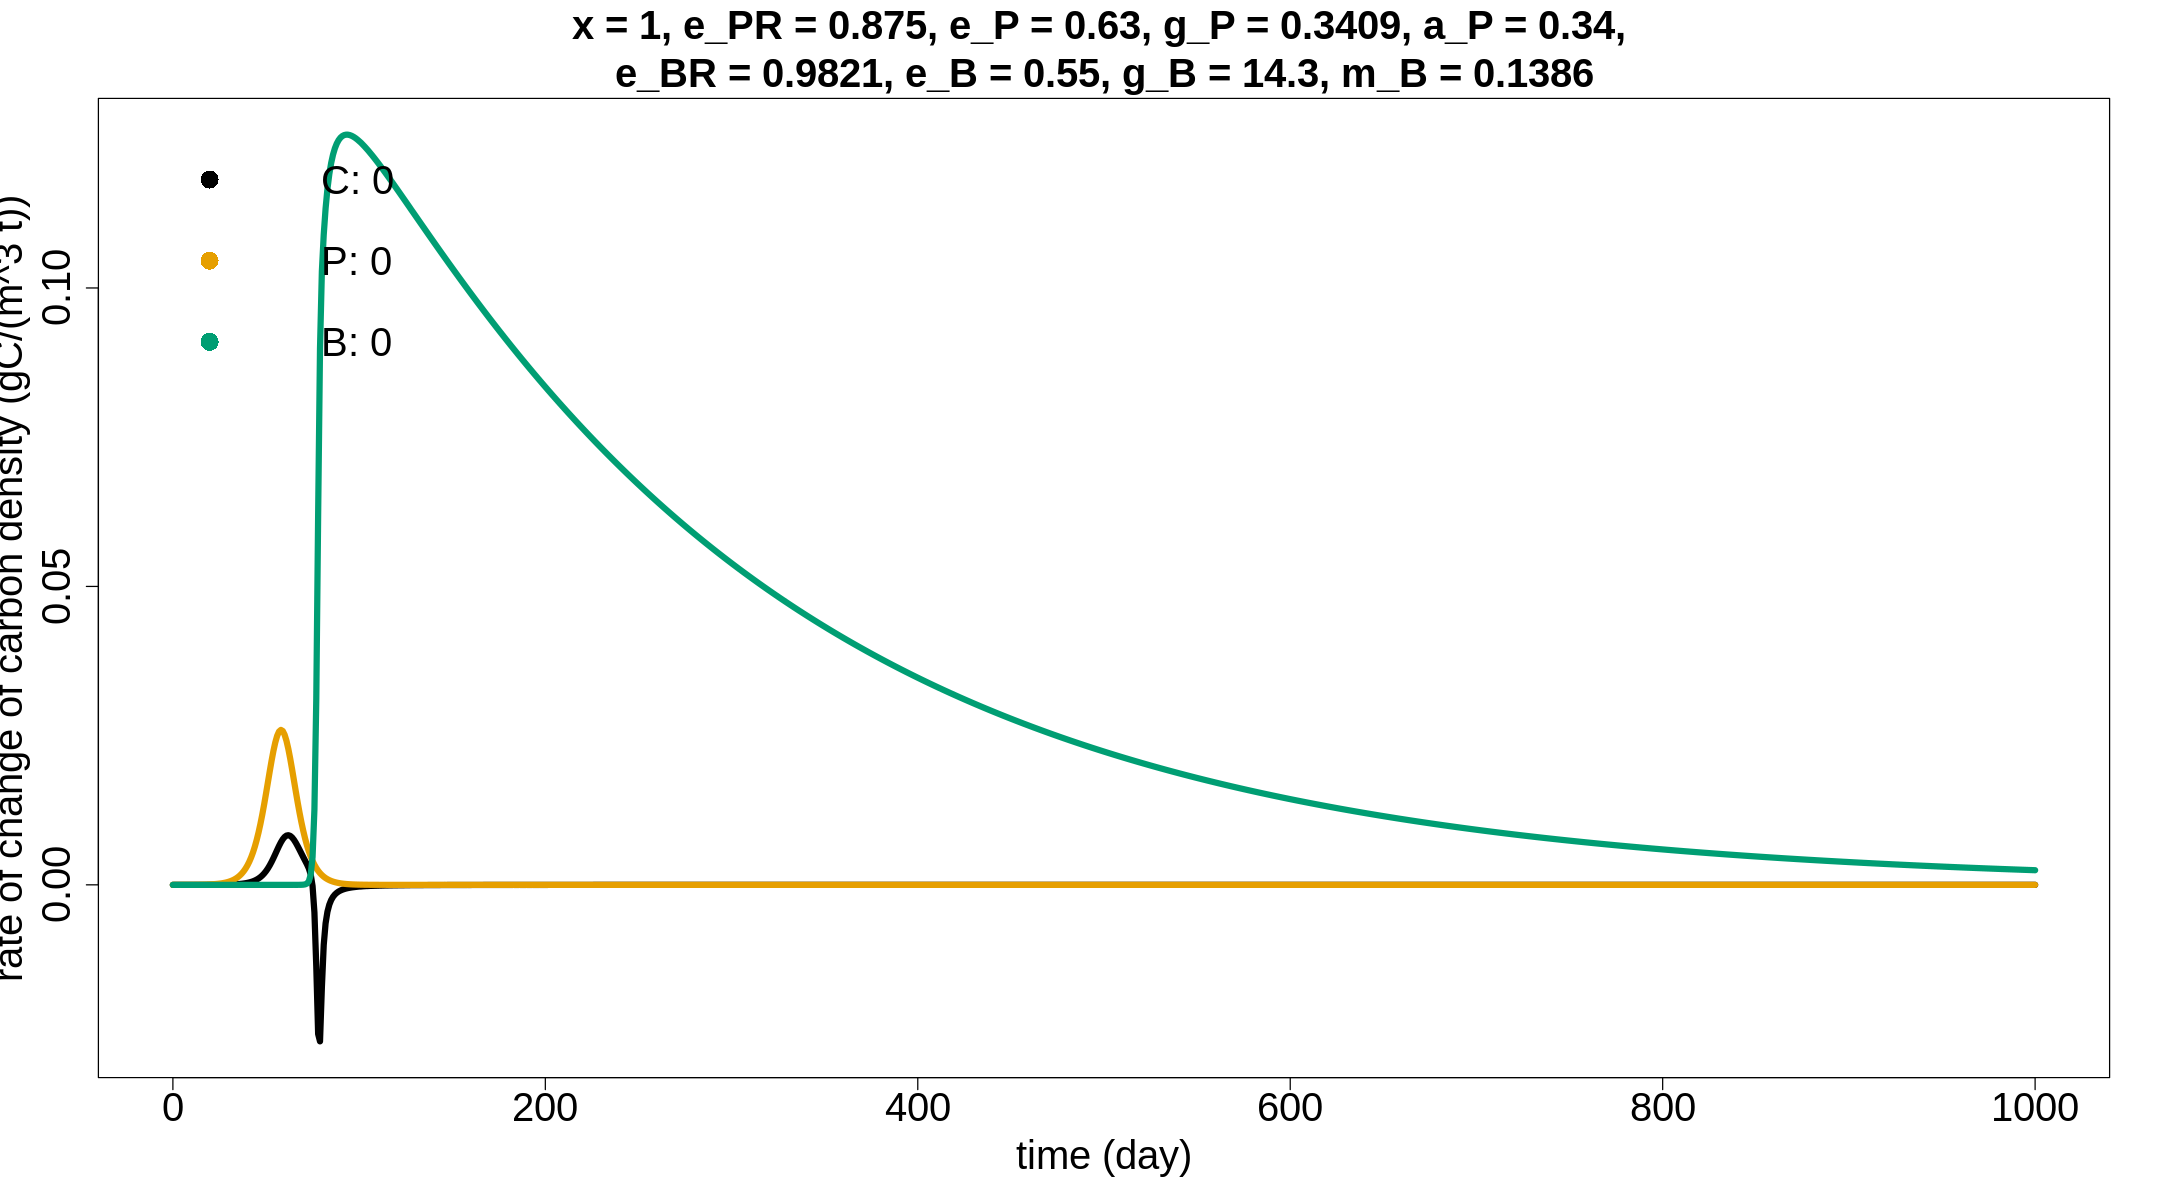

In [14]:
ebcRPlt(rep(1e-5,3),pA0)

# effect of initial carbon density, carbon removal rate not zero

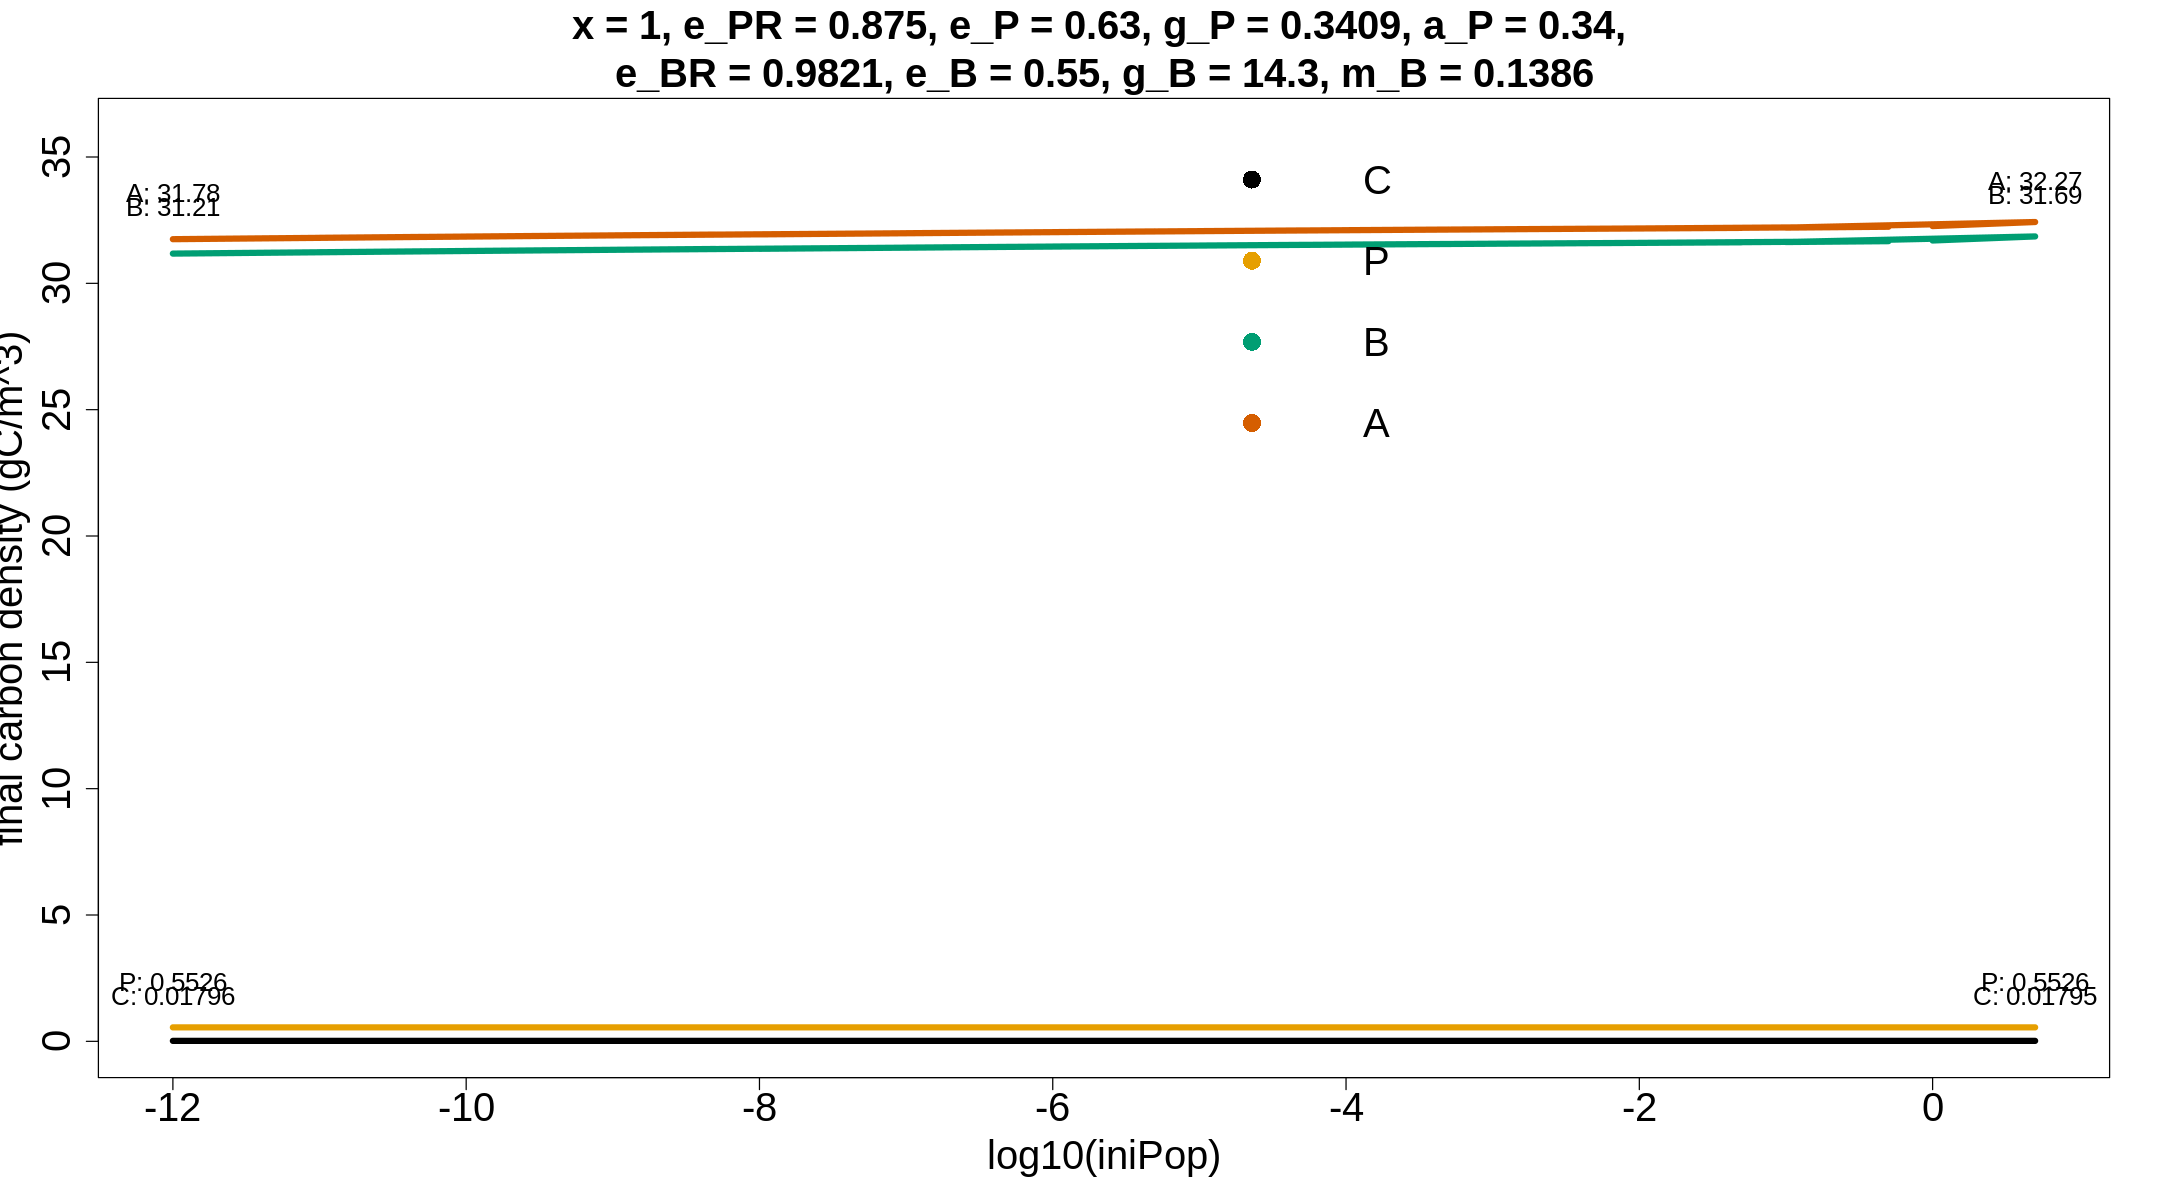

In [15]:
bOundary(pA0)

# effect of carbon removal, initial carbon density = 10$^{-5}gC/m^3$

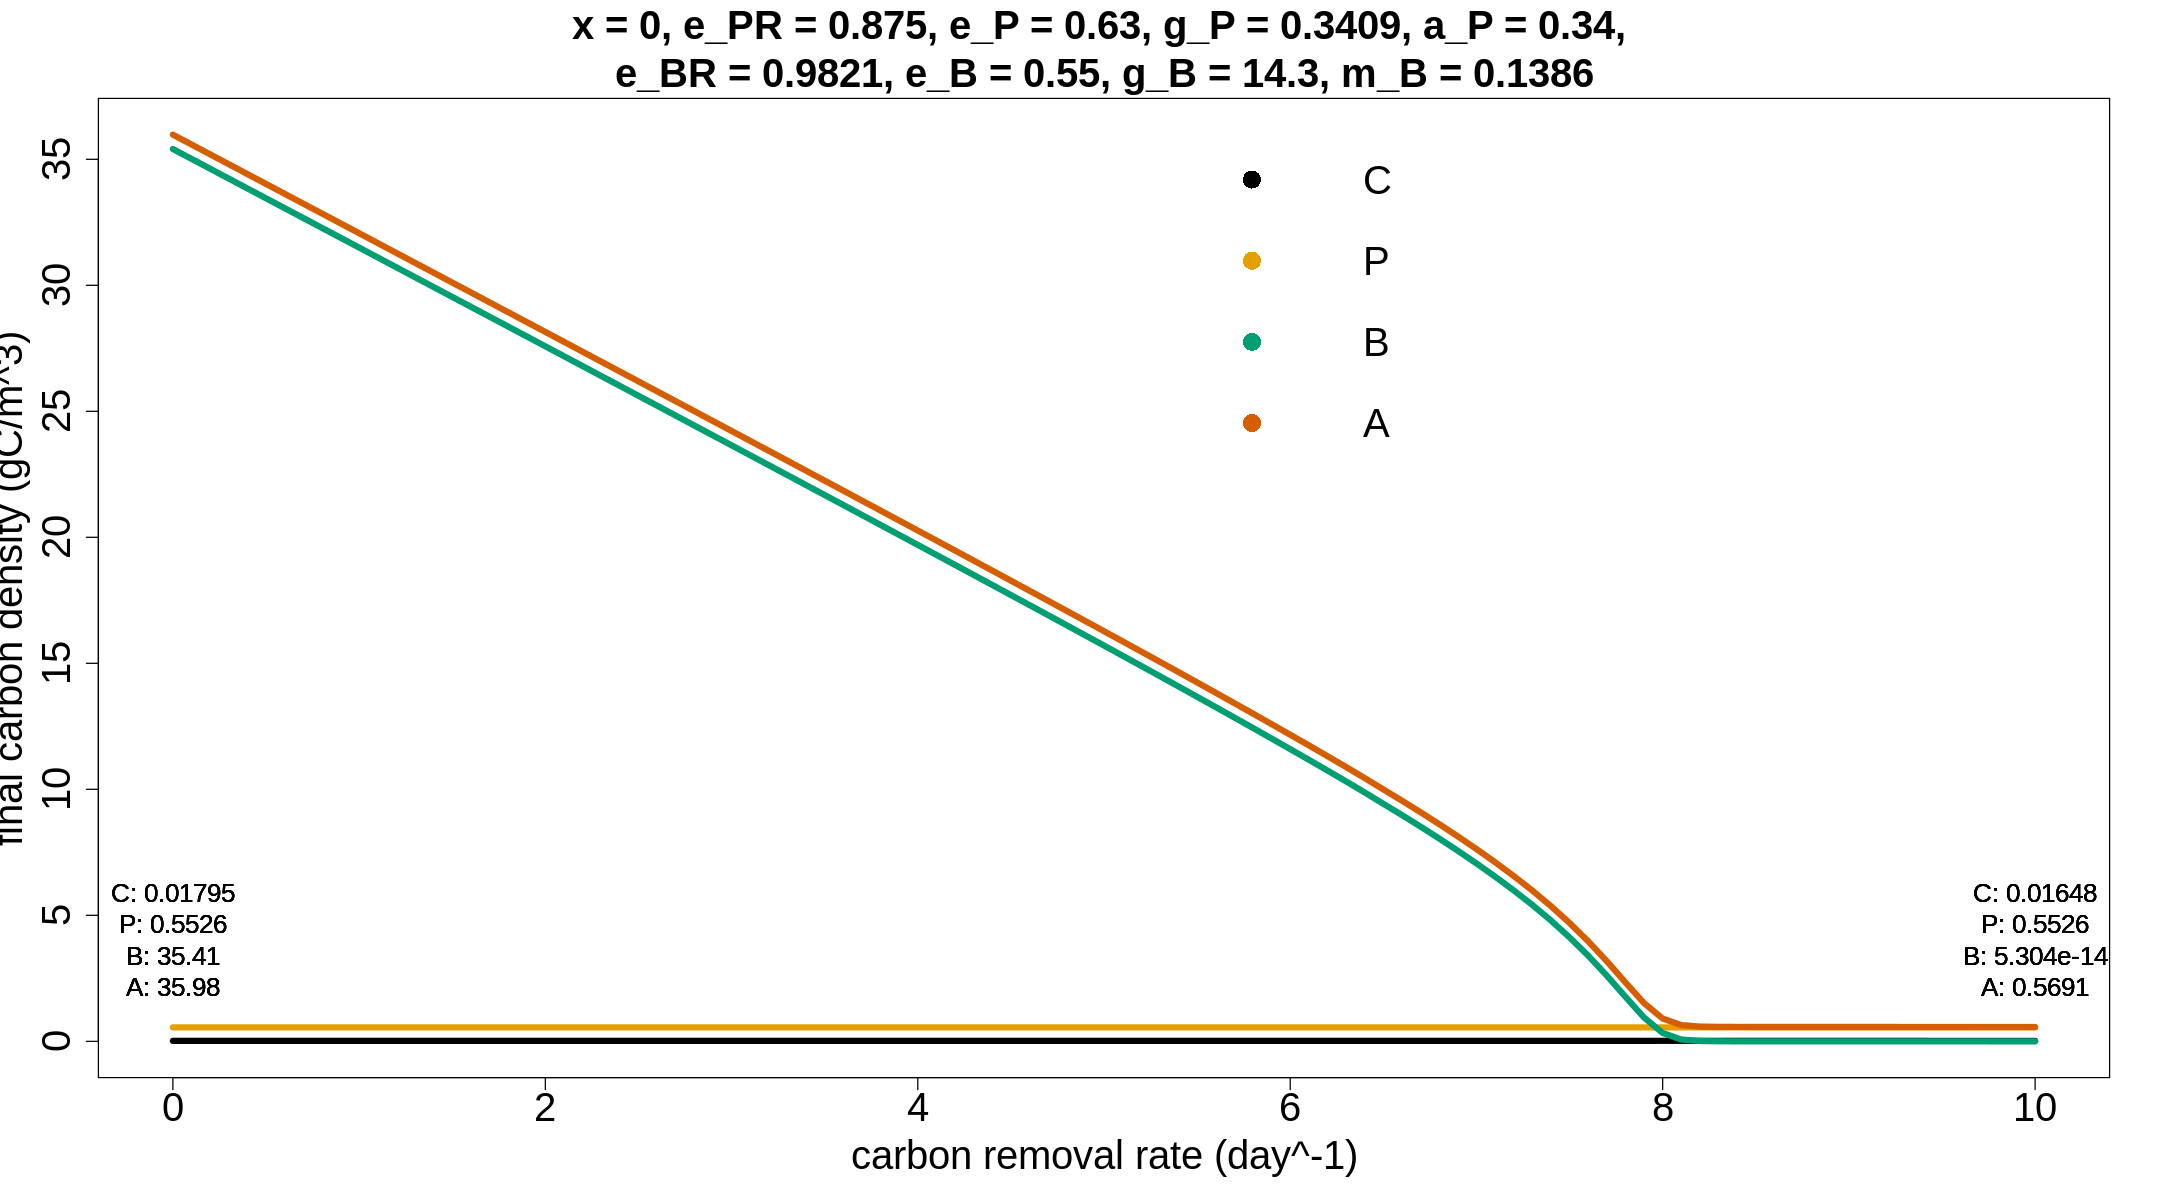

In [16]:
name = c("x","e_PR","e_P","g_P","a_P","\ne_BR","e_B","g_B","m_B")
a = as.data.frame(matrix(NA,nc=4,nr=0))
sEq = seq(0,10, by=.1)

for(i0 in 1:length(sEq)){
    pA1 = c(sEq[i0],pA[-1])
    a1 = ebcAlt(pA1,2)
    a1 = a1[which(a1!=Inf)]
    a0 = ebcData(endTime=1e3, iniPop=1e-5, parameter=pA1)
    a = rbind(a,c(sEq[i0],as.numeric(a0[nrow(a0),-1])))
};rm(i0)
colnames(a) = c("rmC","C","P","B","A")
  
matplot(a[,1],a[,-1], type="l", lty=1, lwd=5, col=cBp[-c(3,5)], xlab="carbon removal rate (day^-1)", ylab="final carbon density (gC/m^3)", cex.lab=2, cex.axis=2, cex.main=2, main=paste0(name," = ",signif(pA,4), collapse=", "))
legend("topright", inset=c(.3,0), legend = colnames(a)[-1], pch = rep(16,3), col = cBp[-c(3,5)], bty="n", cex = 2)
  
text(x=rep(min(a[,1]),4), y=mean(as.matrix(a[,-1]))*.5, label=paste0(colnames(a)[-1],": ",signif(a[which(a[,1]==min(a[,1])),-1],4),collapse = "\n"), cex=1.3)
  
text(x=rep(max(a[,1]),4), y=mean(as.matrix(a[,-1]))*.5, label=paste0(colnames(a)[-1],": ",signif(a[which(a[,1]==max(a[,1])),-1],4),collapse = "\n"), cex=1.3)

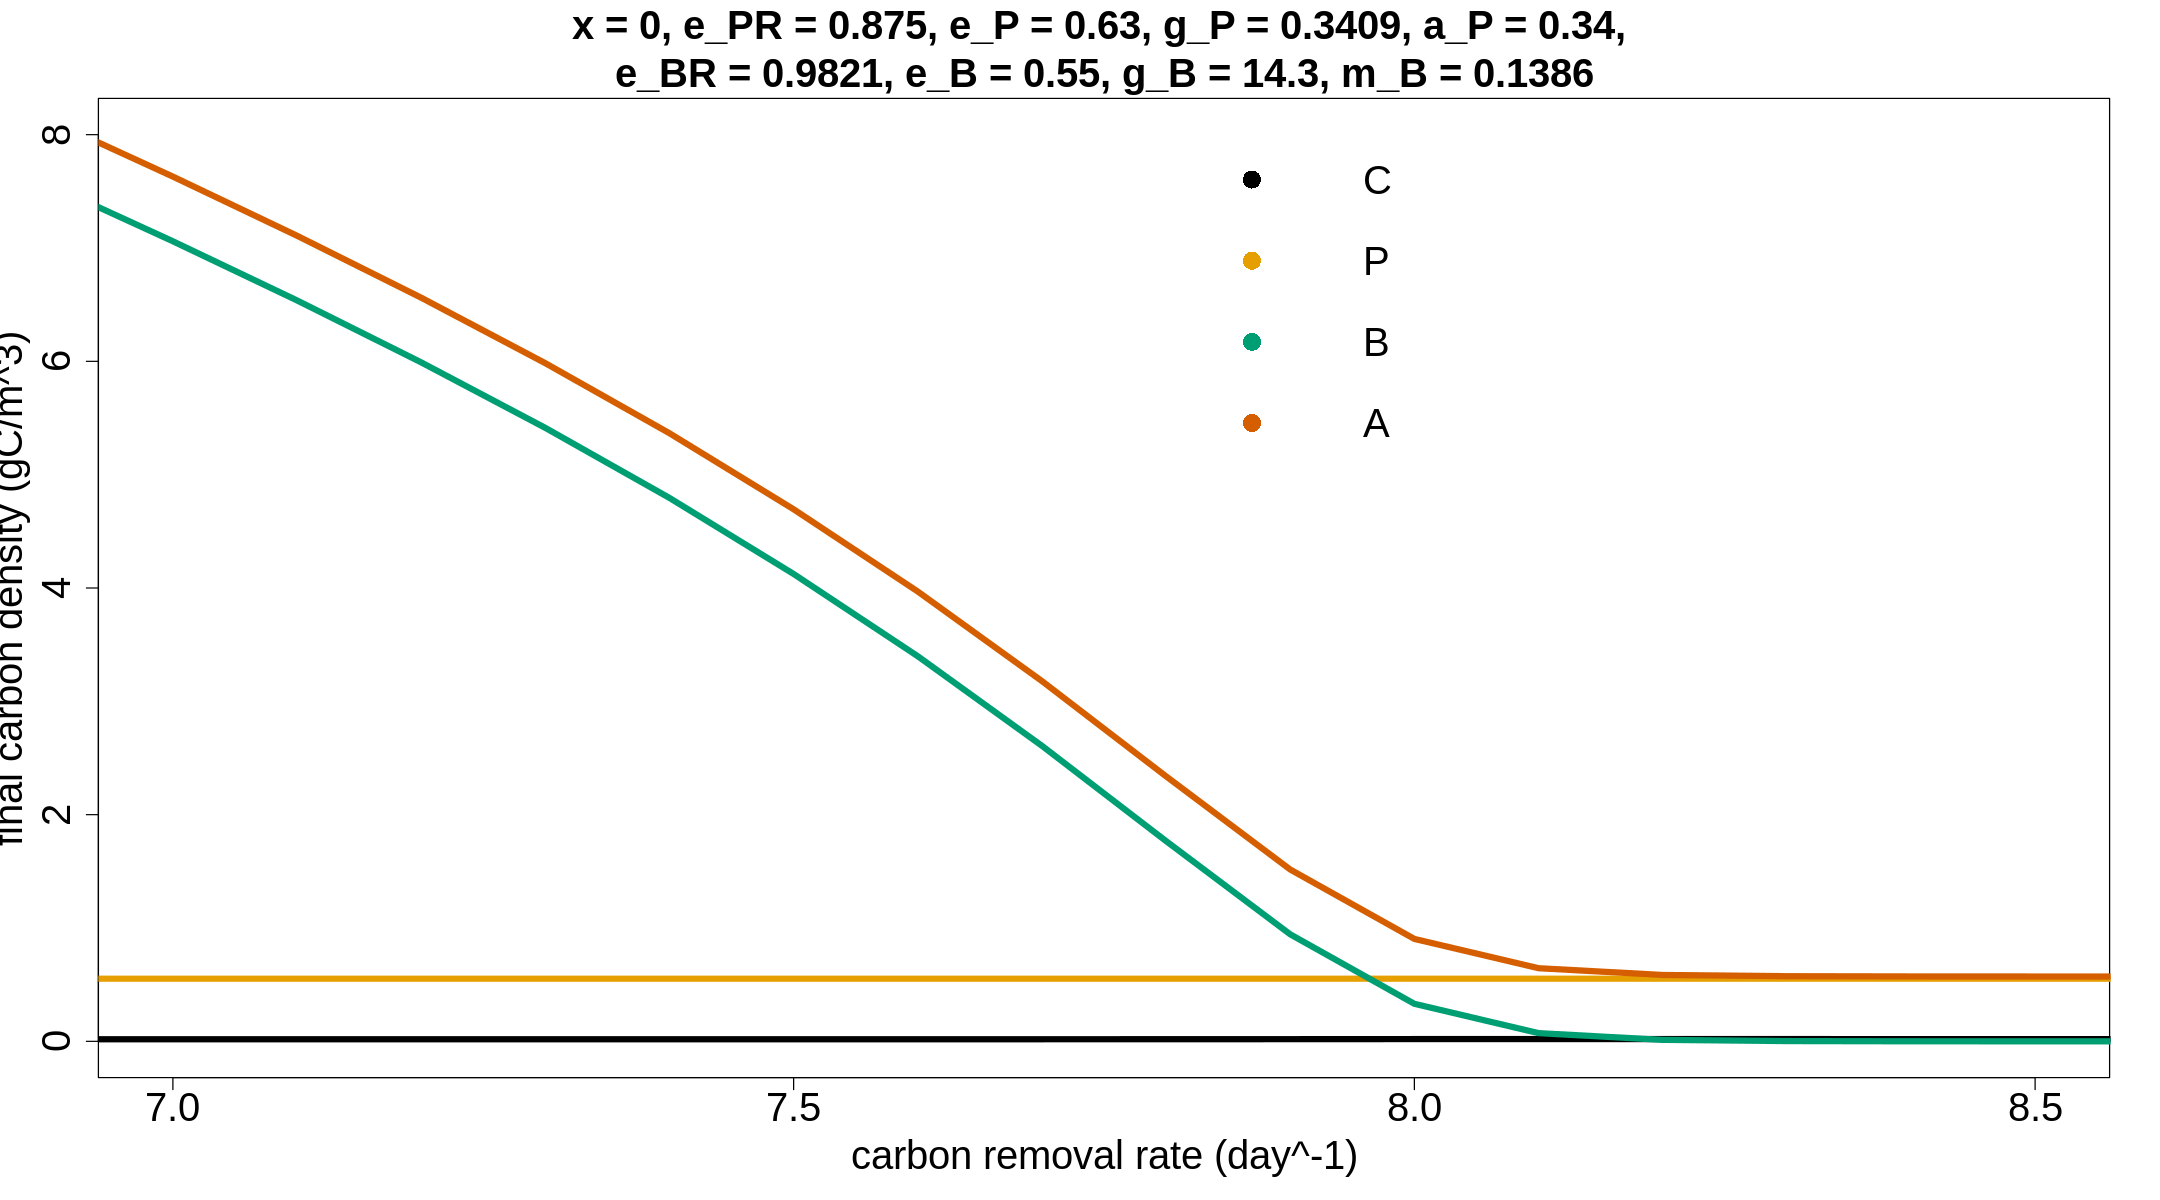

In [17]:
matplot(a[,1],a[,-1], type="l", lty=1, lwd=5, col=cBp[-c(3,5)], xlab="carbon removal rate (day^-1)", ylab="final carbon density (gC/m^3)", cex.lab=2, cex.axis=2, cex.main=2, main=paste0(name," = ",signif(pA,4), collapse=", "), xlim=c(7,8.5), ylim=c(0,8))
legend("topright", inset=c(.3,0), legend = colnames(a)[-1], pch = rep(16,3), col = cBp[-c(3,5)], bty="n", cex = 2)